In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.shape

(200, 5)

In [6]:
x = customer_data.iloc[:,[3,4]].values

In [7]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

F:\Python_working\envs\myenv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Python_working\envs\myenv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Python_working\envs\myenv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Python_working\envs\myenv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a m

In [10]:
wcss

[400.0,
 273.66888662642015,
 157.70400815035947,
 109.22822707921347,
 65.56840815571681,
 60.13287487193422,
 49.66824483736798,
 37.319122878338824,
 32.49508119910091,
 30.05932269404221]

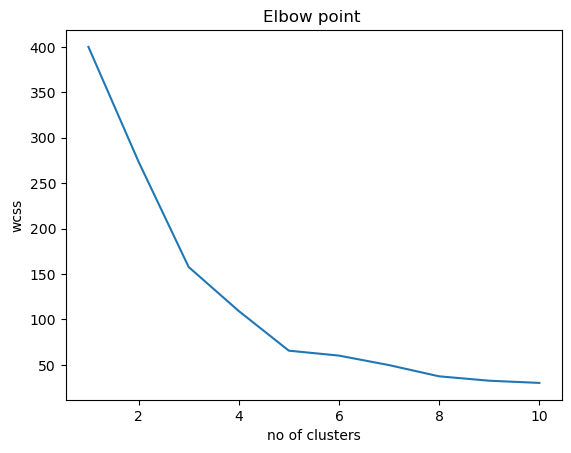

In [11]:
plt.plot(range(1,11),wcss)
plt.title("Elbow point ")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y = kmeans.fit_predict(x_scaled)

F:\Python_working\envs\myenv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

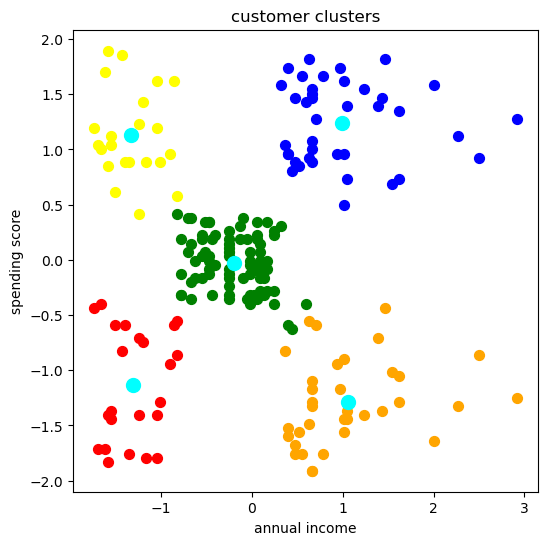

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(x_scaled[y==0,0], x_scaled[y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(x_scaled[y==1,0], x_scaled[y==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(x_scaled[y==2,0], x_scaled[y==2,1],s=50,c='yellow',label='cluster 3')
plt.scatter(x_scaled[y==3,0], x_scaled[y==3,1],s=50,c='orange',label='cluster 4')
plt.scatter(x_scaled[y==4,0], x_scaled[y==4,1],s=50,c='red',label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title("customer clusters")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.show()

In [15]:
kmeans_silhouette = silhouette_score(x_scaled, y)
print("KMeans Silhouette Score:", kmeans_silhouette)

KMeans Silhouette Score: 0.5546571631111091


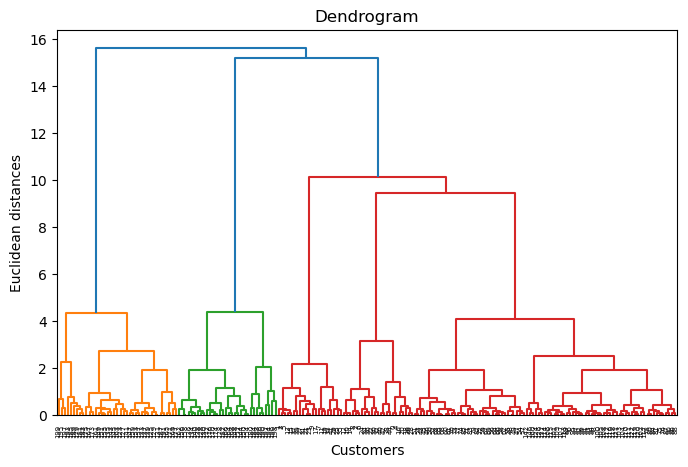

In [16]:
plt.figure(figsize=(8,5))
dendrogram(linkage(x_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [17]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward',)
y_hc = hc.fit_predict(x_scaled)

In [18]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

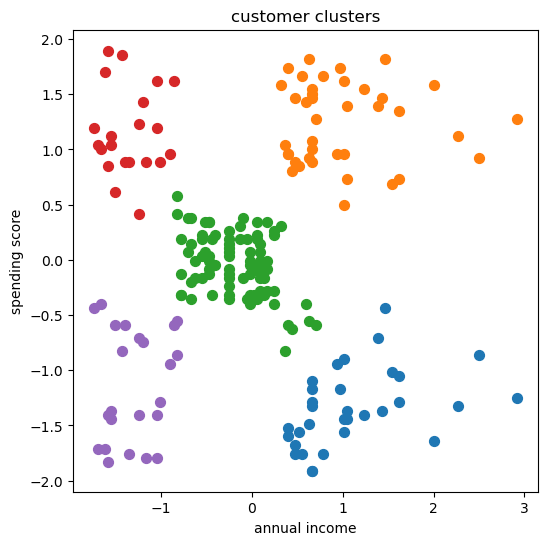

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(x_scaled[y_hc==0,0], x_scaled[y_hc==0,1],s=50,label='cluster 1')
plt.scatter(x_scaled[y_hc==1,0], x_scaled[y_hc==1,1],s=50,label='cluster 2')
plt.scatter(x_scaled[y_hc==2,0], x_scaled[y_hc==2,1],s=50,label='cluster 3')
plt.scatter(x_scaled[y_hc==3,0], x_scaled[y_hc==3,1],s=50,label='cluster 4')
plt.scatter(x_scaled[y_hc==4,0], x_scaled[y_hc==4,1],s=50,label='cluster 5')

plt.title("customer clusters")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.show()

In [20]:
hc_silhouette = silhouette_score(x_scaled, y_hc)
print("Hierarchical Clustering Silhouette Score:", hc_silhouette)

Hierarchical Clustering Silhouette Score: 0.5538089226688662


In [21]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
y_db = dbscan.fit_predict(x_scaled)

In [22]:
y_db

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

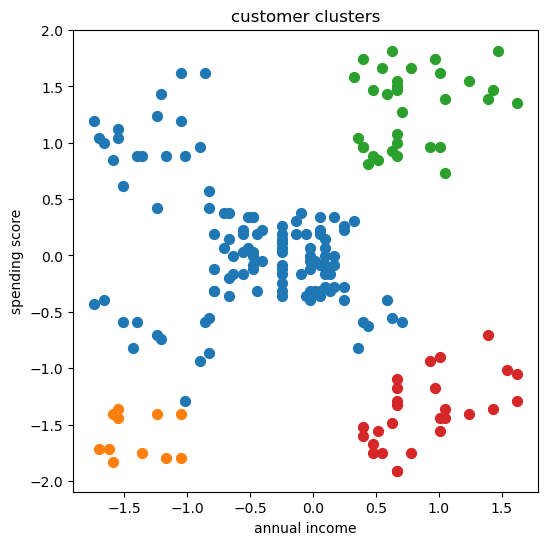

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(x_scaled[y_db==0,0], x_scaled[y_db==0,1],s=50,label='cluster 1')
plt.scatter(x_scaled[y_db==1,0], x_scaled[y_db==1,1],s=50,label='cluster 2')
plt.scatter(x_scaled[y_db==2,0], x_scaled[y_db==2,1],s=50,label='cluster 3')
plt.scatter(x_scaled[y_db==3,0], x_scaled[y_db==3,1],s=50,label='cluster 4')
plt.scatter(x_scaled[y_db==4,0], x_scaled[y_db==4,1],s=50,label='cluster 5')

plt.title("customer clusters")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.show()

In [24]:
db_silhouette = silhouette_score(x_scaled, y_db)
print("DBSCAN Clustering Silhouette Score:", db_silhouette)

DBSCAN Clustering Silhouette Score: 0.41325830390002166


In [25]:
kmeans_silhouette = silhouette_score(x_scaled, y)
print("KMeans Silhouette Score:", kmeans_silhouette)
hc_silhouette = silhouette_score(x_scaled, y_hc)
print("Hierarchical Clustering Silhouette Score:", hc_silhouette)
db_silhouette = silhouette_score(x_scaled, y_db)
print("DBSCAN Clustering Silhouette Score:", db_silhouette)

KMeans Silhouette Score: 0.5546571631111091
Hierarchical Clustering Silhouette Score: 0.5538089226688662
DBSCAN Clustering Silhouette Score: 0.41325830390002166


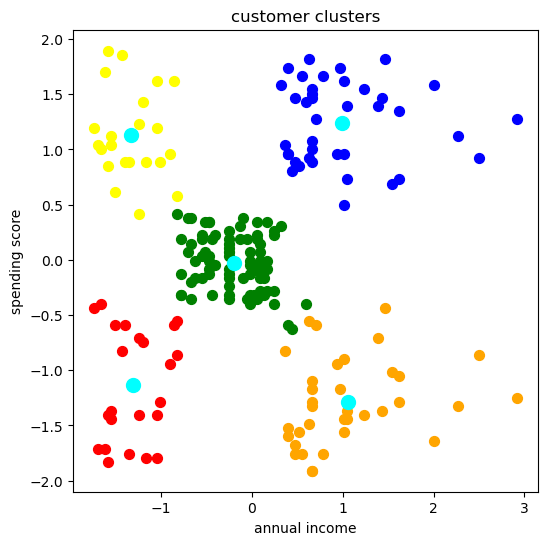

In [26]:
#kmeans clustering gave the best results in this kind of customer segmentation so it is best fit for this problem
plt.figure(figsize=(6,6))
plt.scatter(x_scaled[y==0,0], x_scaled[y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(x_scaled[y==1,0], x_scaled[y==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(x_scaled[y==2,0], x_scaled[y==2,1],s=50,c='yellow',label='cluster 3')
plt.scatter(x_scaled[y==3,0], x_scaled[y==3,1],s=50,c='orange',label='cluster 4')
plt.scatter(x_scaled[y==4,0], x_scaled[y==4,1],s=50,c='red',label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title("customer clusters")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.show()